# 9. Text Analytics

Text analysis, sometimes called text analytics, refers to the representation, processing, and modeling of textual data to derive useful insights.

In general, text analysis is concerned with a *corpus* of documents. These could be sentences in a paragraph, chapters in a book, or indeed books in a corpus. We can typically break the process of analysing text into three steps:

1. **Parsing** is the process of imposing some structure on unstructured text. For example, we could break a raw HTML file into paragraphs, and each paragraph into indivdual words.

2. **Search and Retrieval** is the identification of documents containing certain *key terms* deemed relevant to the analysis.

3. **Text Mining** uses the terms and indices of the previous steps to discover patterns and insights.

Text data is incompatible with the models we have discussed so far because the models require numeric values. For example, we don't have a direct numeric distance between the words "hello" and "friend", so the k-means clustering algorithm cannot be applied to raw text data.

Moreover, sometimes single data points such as a tweet, facebook post etc will contain a large number of distinct words. So we need a way to convert the text data into a flexible numeric representation. This representation should tell us which words occured and how important their appearance is to the meaning of a document. This should be related to how many times the word appears, and how much information is contained in the word.

There are many ways to represent text numerically. The simplest way is known as Bag-of-Words (BoW) representation.


## Bag-of-Words

The bag-of-words model is a simple method of transforming strings of text into a numeric representation. BoW treats each word as a feature and the value of the feature is the number of times it occurds.

For example the string

    "The quick brown fox jumps over the lazy dog"
    
would be transformed into

| the | quick | brown | fox | jumps | over | lazy | dog |
|---|---|---|---|---|---|---|---|
| 2 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |

Note that:
- the word "the" occurs twice so its count is 2
- other words are unique so they only occur once
- the number of features is the number of unique words

Also note that for only one sentence we have 8 columns, as most of the words are distinct. If our analysis is focussed on a large *corpus* (or collection) of text documents, the number of columns is far larger. For instance the Google n-Grams corpus of publicly accessible web pages contains about one million distinct words.

So text analytics suffers from the *high dimensionality* problem, wherein the number of columns in a dataset is large relative to the number of rows. Fitting models in a high-dimensional space means that there is a lot of room for error, so there is a large focus on reducing the dimensionality of textual data representation.


## TF-IDF

In text data there will be lots of repeated words such as "a", "is" and "the" that aren't very useful, yet with BoW representation they will have a high associated weight. We should ignore them as much as possible.

The Term Frequency–Inverse Document Frequency (TF-IDF) is a weighting procedure for BoW data. The TF-IDF weights boost the counts or frequency of uncommon words (which will be useful) and shrinks the mangitude associated with common words. There are two components to the TF-IDF weights, and each of these can be calculated in different ways:

- Term Frequency, often the _raw count_ of a term in a document $tf = f_D$. Other possibilities are boolean (1 if the term appears, otherwise 0), length adjusted ($tf = \frac{f_D}{n_{words}}$) or logarithmic ($tf = \log(1+f_D)$).

- Inverse Document Frequency, or a measure of the information contained in a word. This is a penalty for commonly used words like 'a' and 'the'. It's the logarithmically scaled inverse fraction of documents that contain the word (obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient). $idf = \log(\frac{N}{n_D})$ where $N$ is the number of documents and $n_D$ is the number of documents in which the word appears.

The tfidf score is calculated as follows:

$$tfidf = tf \cdot idf $$

As an example, consider the following corpus of two documents:

    "The quick brown fox jumps over the lazy dog"
    "The five boxing wizards jump quickly"
    
The *raw count* $tf$ weight of the word `The` is 2 in the first document, and 1 in the second. The $idf$ weight of `The`, defined for the whole corpus, is $idf = \log(\frac{2}{2}) = 0$. Hence the $tfidf$ weights of `The` in both documents is 0. This is appropriate since the word `The` carries very little meaning in each sentence.

Now consider the word `wizards`. The raw count $tf$ weight is 0 in the first document, and 1 in the second. The $idf$ weight is $idf = \log(\frac{2}{1}) \approx 0.7 $, the largest possible value in this corpus. Hence the $tfidf$ weight is 0 in the first document, and $tfidf \approx 0.7$ in the second, which is appropriate since, intuitively, `wizard` contributes a lot of meaning to the sentence.

## Topic Modelling

Topic models are statistical models that examine words from a set of documents, determine the themes over the text, and discover how the themes are associated or change over time. The process of topic modeling can be simplified to the following.

1. Uncover the hidden topical patterns within a corpus.

2. Annotate documents according to these topics.

3. Use annotations to organize, search, and summarise texts.

A topic is formally defined as a distribution over a fixed vocabulary of words. Different topics would have different distributions over the same vocabulary. A topic can be viewed as a cluster of words with related meanings, and each word has a corresponding weight inside this topic. Note that a word from the vocabulary can reside in multiple topics with different weights. Topic models do not necessarily require prior knowledge of the texts. The topics can emerge solely based on analyzing the text.

Latent Dirichlet allocation is one of the most common algorithms for topic modeling. Without diving into the math behind the model, we can understand it as being guided by two principles.

- Every document is a mixture of topics. We imagine that each document may contain words from several topics in particular proportions. For example, in a two-topic model we could say “Document 1 is 90% topic A and 10% topic B, while Document 2 is 30% topic A and 70% topic B.”

- Every topic is a mixture of words. For example, we could imagine a two-topic model of American news, with one topic for “politics” and one for “entertainment.” The most common words in the politics topic might be “President”, “Congress”, and “government”, while the entertainment topic may be made up of words such as “movies”, “television”, and “actor”. Importantly, words can be shared between topics; a word like “budget” might appear in both equally.

LDA is a mathematical method for estimating both of these at the same time: finding the mixture of words that is associated with each topic, while also determining the mixture of topics that describes each document. There are a number of existing implementations of this algorithm, and we’ll explore one of them in depth. Let's use the `AssociatedPress` dataset from the topicmodels library.

In [1]:
library(topicmodels)

data("AssociatedPress")

AssociatedPress

<<DocumentTermMatrix (documents: 2246, terms: 10473)>>
Non-/sparse entries: 302031/23220327
Sparsity           : 99%
Maximal term length: 18
Weighting          : term frequency (tf)

We can use the LDA() function from the topicmodels package, setting k = 2, to create a two-topic LDA model.

In [2]:
# set a seed so that the output of the model is predictable
ap_lda <- LDA(AssociatedPress, k = 2, control = list(seed = 1234))
ap_lda

A LDA_VEM topic model with 2 topics.

As always, fitting the model is the easy part. The rest of the analysis will involve exploring and interpreting the results using the `tidy()` method from the `tidytext` package. This extracts the per-topic-per-word probabilities, called $\beta$ (“beta”), from the model.

In [3]:
library(tidytext)

ap_topics <- tidy(ap_lda, matrix = "beta")

head(ap_topics)

topic,term,beta
<int>,<chr>,<dbl>
1,aaron,1.686917e-12
2,aaron,3.895941e-05
1,abandon,2.654910e-05
2,abandon,3.990786e-05
1,abandoned,1.390663e-04
2,abandoned,5.876946e-05


Notice that this has turned the model into a one-topic-per-term-per-row format. For each combination, the model computes the probability of that term being generated from that topic. For example, the term “aaron” has a  
1.686917×10^-12 probability of being generated from topic 1, but a 3.895941×10^−5 probability of being generated from topic 2.

We could use `dplyr`’s `top_n()` to find the 10 terms that are most common within each topic. As a tidy data frame, this lends itself well to a ggplot2 visualization.


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



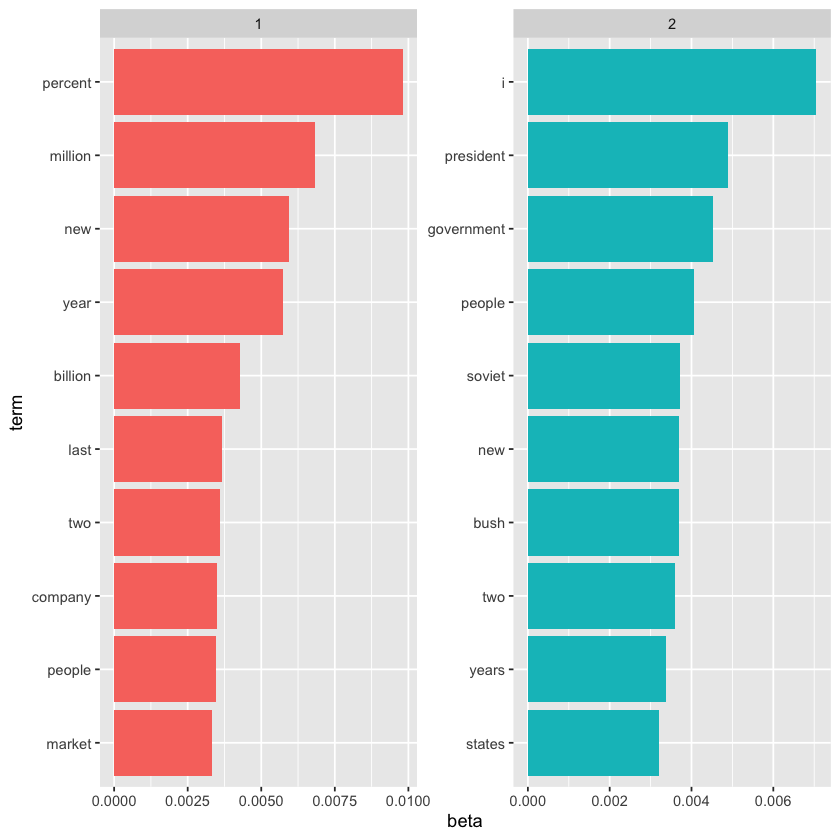

In [4]:
library(ggplot2)
library(dplyr)

ap_top_terms <- ap_topics %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

ap_top_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip() +
  scale_x_reordered()

Besides estimating each topic as a mixture of words, LDA also models each document as a mixture of topics. We can examine the per-document-per-topic probabilities, called $\gamma$ (“gamma”), with the `matrix = "gamma"` argument to `tidy()`.

In [5]:
ap_documents <- tidy(ap_lda, matrix = "gamma")

head(ap_documents, 10)

document,topic,gamma
<int>,<int>,<dbl>
1,1,0.2480616686
2,1,0.3615485445
3,1,0.5265844180
4,1,0.3566530023
5,1,0.1812766762
6,1,0.0005883388
7,1,0.7734215655
8,1,0.0044516994
9,1,0.9669915139


Each of these values is an estimated proportion of words from that document that are generated from that topic. For example, the model estimates that only about 25% of the words in document 1 were generated from topic 1.

We can see that many of these documents were drawn from a mix of the two topics, but that document 6 was drawn almost entirely from topic 2, having a $\gamma$ from topic 1 close to zero. To check this answer, we could `tidy()` the document-term matrix and check what the most common words in that document were.

In [6]:
tidy(AssociatedPress) %>%
  filter(document == 6) %>%
  arrange(desc(count)) %>%
  head(10)

document,term,count
<int>,<chr>,<dbl>
6,noriega,16
6,panama,12
6,jackson,6
6,powell,6
6,administration,5
6,economic,5
6,general,5
6,i,5
6,panamanian,5


Based on the most common words, this appears to be an article about the relationship between the American government and Panamanian dictator Manuel Noriega, which means the algorithm was right to place it in topic 2 (as political/national news).

## Sentiment Analysis

In addition to the TFIDF and topic models, the Data Science team may want to identify the sentiments in user comments and reviews of the ACME products. Sentiment analysis refers to a group of tasks that use statistics and natural language processing to mine opinions to identify and extract subjective information from texts.

Intuitively, to conduct sentiment analysis, one can manually construct lists of words with positive sentiments (such as brilliant, awesome, and spectacular) and negative sentiments (such as awful, stupid, and hideous). Related work has pointed out that such an approach can be expected to achieve accuracy around 60%, and it is likely to be outperformed by examination of corpus statistics. For instance, the word 'lightweight' might be positive in cellphone reviews, but negative in textbook reviews.

Classification methods such as naïve Bayes, maximum entropy (MaxEnt), and support vector machines (SVM) are often used to extract corpus statistics for sentiment analysis. Related research has found out that these classifiers can score around 80% accuracy on sentiment analysis over unstructured data.

Unstructured text is first transformed to TFIDF format and each document is labelled with a sentiment (positive, negative or neutral). This is then used to train a classification algorithm, and a portion of the data is reserved to test the resulting model. One or more of such classifiers can be applied to unstructured data, such as movie reviews or even tweets. These classifiers can only model the data they are trained on, however, so it's generally a bad idea to use a classifier trained on reviews to analyse tweets, for example.

The precision and recall of the model are important concepts, whether the task is about information retrieval of a search engine or text analysis over a finite corpus. A good classifier ideally should achieve both precision and recall close to 1.0. In information retrieval, a perfect precision score of 1.0 means that every result retrieved by a search was relevant (but says nothing about whether all relevant documents were retrieved), whereas a perfect recall score of 1.0 means that all relevant documents were retrieved by the search (but says nothing about how many irrelevant documents were also retrieved). Both precision and recall are therefore based on an understanding and measure of relevance. Therefore, the Data Science team needs to check the cleanliness of the data, optimize the classifier, and find if there are ways to improve the precision while retaining the high recall.